# Creating MLP with Keras

This is a test to creat a MLP with Keras for the Kick Off ANN.

# Libraries

In [10]:
# !pip install tensorflow

In [11]:
#MLP with keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

#data
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#plot
import matplotlib.pyplot as plt

In [12]:
#data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model

In [13]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

#train
history = model.fit(X_train, y_train, epochs=100, verbose=1)

#evaluate
loss, accuracy = model.evaluate(X_test, y_test)
# print('loss:', loss)
# print('accuracy:', accuracy)

#plot the loss
# plt.plot(history.history['loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()



Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.5673
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.5459 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.5210 
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.4967 
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.4616 
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.4688 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.4220 
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8821 - loss: 0.3988 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8463 - loss: 0.4205 
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8671 - loss: 0.3758 
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3558 
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [14]:
class CustomModel:
    def __init__(self, input_dim, layers, activations, optimizer='adam', learning_rate=0.01):
        """
        Initialize the CustomModel class.

        Parameters:
        - input_dim: int, the number of input features.
        - layers: list of int, the number of neurons in each layer.
        - activations: list of str, the activation function for each layer.
        - optimizer: str, the optimizer to use (default is 'adam').
        - learning_rate: float, the learning rate for the optimizer (default is 0.001).
        """
        self.input_dim = input_dim
        self.layers = layers
        self.activations = activations
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.model = self.build_model()

    def build_model(self):
        """
        Build the Sequential model based on the specified layers and activations.
        """
        model = Sequential()
        
        # Add the first layer with input dimension
        model.add(Dense(self.layers[0], input_dim=self.input_dim, activation=self.activations[0]))
        
        # Add the remaining layers
        for neurons, activation in zip(self.layers[1:], self.activations[1:]):
            model.add(Dense(neurons, activation=activation))
        
        # Compile the model
        if self.optimizer == 'adam':
            optimizer = Adam(learning_rate=self.learning_rate)
        else:
            raise ValueError("Currently only 'adam' optimizer is supported.")
        
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        """
        Train the model on the provided training data.

        Parameters:
        - X_train: array-like, the training data.
        - y_train: array-like, the training labels.
        - epochs: int, the number of epochs to train (default is 10).
        - batch_size: int, the batch size for training (default is 32).
        """
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model on the provided test data.

        Parameters:
        - X_test: array-like, the test data.
        - y_test: array-like, the test labels.
        """
        return self.model.evaluate(X_test, y_test)

    def predict(self, X):
        """
        Make predictions on the provided data.

        Parameters:
        - X: array-like, the data to make predictions on.
        """
        return self.model.predict(X)

    def save_model(self, filename):
        """
        Save the model to a file.

        Parameters:
        - filename: str, the name of the file to save the model to.
        """
        self.model.save(filename)

    def load_model(self, filename):
        """
        Load a model from a file.

        Parameters:
        - filename: str, the name of the file to load the model from.
        """
        from keras.models import load_model
        self.model = load_model(filename)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5952 - loss: 1.8085    
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3202 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8861 - loss: 0.2227 
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2041 
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8889 - loss: 0.2097 
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9141 - loss: 0.1740 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1237 
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.1173 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.0970 
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0670 
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9888 - loss: 0.0466 
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

Test Accuracy: 0.996666669845581
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


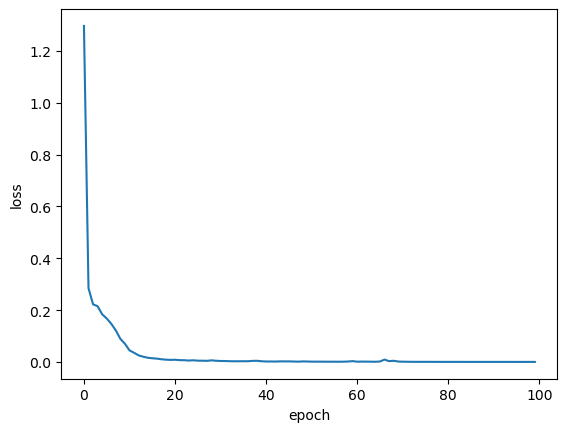

In [15]:
# One-hot encode the target arrays
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Example usage
if __name__ == "__main__":
    # Define the model parameters
    input_dim = 2  # Number of input features
    layers = [32, 12, 10] # The last one is the number of output classes
    activations = ['relu', 'relu', 'softmax']

    # Create the custom model
    custom_model = CustomModel(input_dim, layers, activations)

    # Assume X_train, y_train, X_test, y_test are your data
    # Train the model
    custom_model.train(X_train, y_train_one_hot, epochs=100, batch_size=32)

    # Evaluate the model
    loss, accuracy = custom_model.evaluate(X_test, y_test_one_hot)
    print(f"Test Accuracy: {accuracy}")

    # Save the model
    custom_model.save_model("custom_model.h5")

    # Load the model
    custom_model.load_model("custom_model.h5")

    # Make predictions
    predictions = custom_model.predict(X_test)

    # plot the loss of the model
    plt.plot(custom_model.history.history['loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()